In [ ]:
# Googleドライブへのマウント（Colab用コード）
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/ou_dip/"
from google.colab.patches import cv2_imshow # colab内で画像表示関数がうまく動かないので、パッチが提供されている

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/ou_dip


In [ ]:
import cv2
import numpy as np  # PythonのOpenCVでは、画像はnumpyのarrayとして管理される
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
  if img.ndim == 3:
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img))
  else:
    display(Image.fromarray(img))

In [ ]:
# Borrowed from https://docs.opencv.org/4.x/d4/dee/tutorial_optical_flow.html

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0, 255, (100, 3))

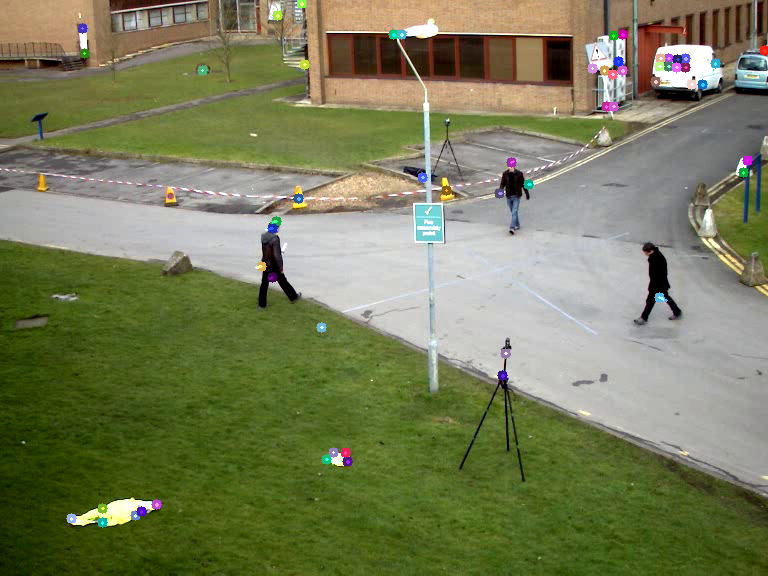

In [ ]:
# 動画の読み込み
cap = cv2.VideoCapture('sample.avi')

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

frame_count = 0
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv2.add(frame, mask)

    # display
    if frame_count % 10 == 0: # 10フレームごと
      cv2_imshow(img)

    k = cv2.waitKey(30) & 0xff
    if k == 27 or frame_count > 100:  # 100フレームまでで止めた
        break

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

    frame_count = frame_count + 1

cap.release()